<div align="center" style="font-size:24px;"><b>Predict Credit Card Customer Defaults</b><br><br>By Marcela Lizarazo </div>

### Table of Contents:

1. Introduction
2. Data Description
3. Understanding variables and data cleaning
4. Exploratory Data Analysis
5. Variable Selection
6. Data Transformation
7. Modeling Approach
8. Model Validation and Evaluation
9. Analysis and Results

### 1. Introduction
This dataset focuses on studying the payment behavior and credit card default by clients in Taiwan. The primary goal of the dataset is to provide information to predict the likelihood of default on credit card payments. Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository.https://doi.org/10.24432/C55S3H.

The credit card dataset consists of 30,000 observations, for which there are 23 independent variables including demographic factors, credit data, history of payment, and bill statements of credit card customers from April 2005 to September 2005 and 1 dependent variable (default payment).

### 2. Data Description

#### Demographic variables:


- **ID:** ID of each client, categorical variable
- **LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- **SEX:** Gender, categorical variable (1=male, 2=female)
- **EDUCATION:** level of education, categorical variable (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- **MARRIAGE:** Marital status, categorical variable (1=married, 2=single, 3=others)
- **AGE:** Age in years, numerical variable

#### Delay of the past payment variables:


**The measurement scale for the repayment status is:** (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

- **PAY_0:** Repayment status in September 2005 
- **PAY_2:** Repayment status in August 2005
- **PAY_3:** Repayment status in July 2005
- **PAY_4:** Repayment status in June 2005
- **PAY_5:** Repayment status in May 2005
- **PAY_6:** Repayment status in April 2005

#### Amount of bill statement variables:


- **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

#### Amount of previous payment variables:


- **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)


#### Dependent variable:


- **default.payment.next.month:** indicate whether the credit card holders are defaulters or non-defaulters (1=yes, 0=no)

### 3. Understanding variables and data cleaning¶

Understanding variables and conducting data cleaning processes are crucial for achieving accurate results in analysis and decision-making. Data quality directly influences the validity of conclusions, preventing biases and errors. Moreover, it facilitates the accurate interpretation of patterns, enhancing the reliability of any statistical analysis or predictive model.

In [1]:
pip install xlrd

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
# Load the dataset
data = pd.read_excel('Data_Set.xls')

In [5]:
data.shape

(30001, 25)

In [6]:
# Display the first few rows to get a preview of the data
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In this first view we can see that the dataset has a header with labels such as X1, X2, ... X23, Y, for a simpler handling of the dataset we will proceed to eliminate the header:

In [7]:
# Fixing the header
# The dataset's first row contains the column names. I set this row as the header.
new_header = data.iloc[0]  # Grab the first row for the header
data = data[1:]  # Take the data less the header row
data.columns = new_header  # Set the header row as the dataframe header

In [8]:
# Display the first few rows after Fixing the header
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Display the last few rows to see the end of the data
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [10]:
# Get general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

Here we can see that all the data are classified as object, we are going to make a conversion of the type of data according to the initial description to facilitate future operations, visualizations and data processing:

In [11]:
# Data Type Conversion

# Convert columns to appropriate data types. 

#Here, assuming numeric columns need conversion.
numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                   'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                   'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
# Numeric columns are now in proper numeric format, allowing for numerical operations.

In [12]:
#Here, assuming categorical columns need conversion.
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']

for col in categorical_columns:
    data[col] = data[col].astype('category')

# categorial columns are now in proper format, allowing for visualizations.

In [13]:
# Get general information after type conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  object  
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

In [14]:
# No Duplicate values
data.duplicated().value_counts()

False    30000
Name: count, dtype: int64

In [15]:
# Check for unique values in each column
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

ID: 30000 unique values
LIMIT_BAL: 81 unique values
SEX: 2 unique values
EDUCATION: 7 unique values
MARRIAGE: 4 unique values
AGE: 56 unique values
PAY_0: 11 unique values
PAY_2: 11 unique values
PAY_3: 11 unique values
PAY_4: 11 unique values
PAY_5: 10 unique values
PAY_6: 10 unique values
BILL_AMT1: 22723 unique values
BILL_AMT2: 22346 unique values
BILL_AMT3: 22026 unique values
BILL_AMT4: 21548 unique values
BILL_AMT5: 21010 unique values
BILL_AMT6: 20604 unique values
PAY_AMT1: 7943 unique values
PAY_AMT2: 7899 unique values
PAY_AMT3: 7518 unique values
PAY_AMT4: 6937 unique values
PAY_AMT5: 6897 unique values
PAY_AMT6: 6939 unique values
default payment next month: 2 unique values


In [16]:
# Check for null values in the dataset
data.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [17]:
# Statistical summary of numerical variables
data.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


- The dataset shows diverse ranges and distributions across various features. For instance, **'LIMIT_BAL'** (credit limit) varies from $1,000 to $1,000,000, while **'AGE'** ranges from 21 to 79. 

- Descriptive statistics provide insights into central tendencies, dispersions, and potential outliers for further analysis.

### 4. Exploratory Data Analysis

When reviewing the unique values we can identify a difference in some categorical variables, so let's review them one by one to ensure that there are no outliers or anomalies in the dataset:

### 4.1. Outlier analysis

Outlier analysis is crucial for identifying data points that significantly deviate from the overall pattern, as outliers can distort statistical analyses and machine learning models. Detecting and addressing outliers enhance the robustness and reliability of data-driven insights and predictions.

#### 4.1.1. Numerical Variables

In [18]:
# Function to calculate IQR and identify outliers
def identify_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers)

C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\3255975692.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\3255975692.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\3255975692.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\3255975692.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\3255975692.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the fi

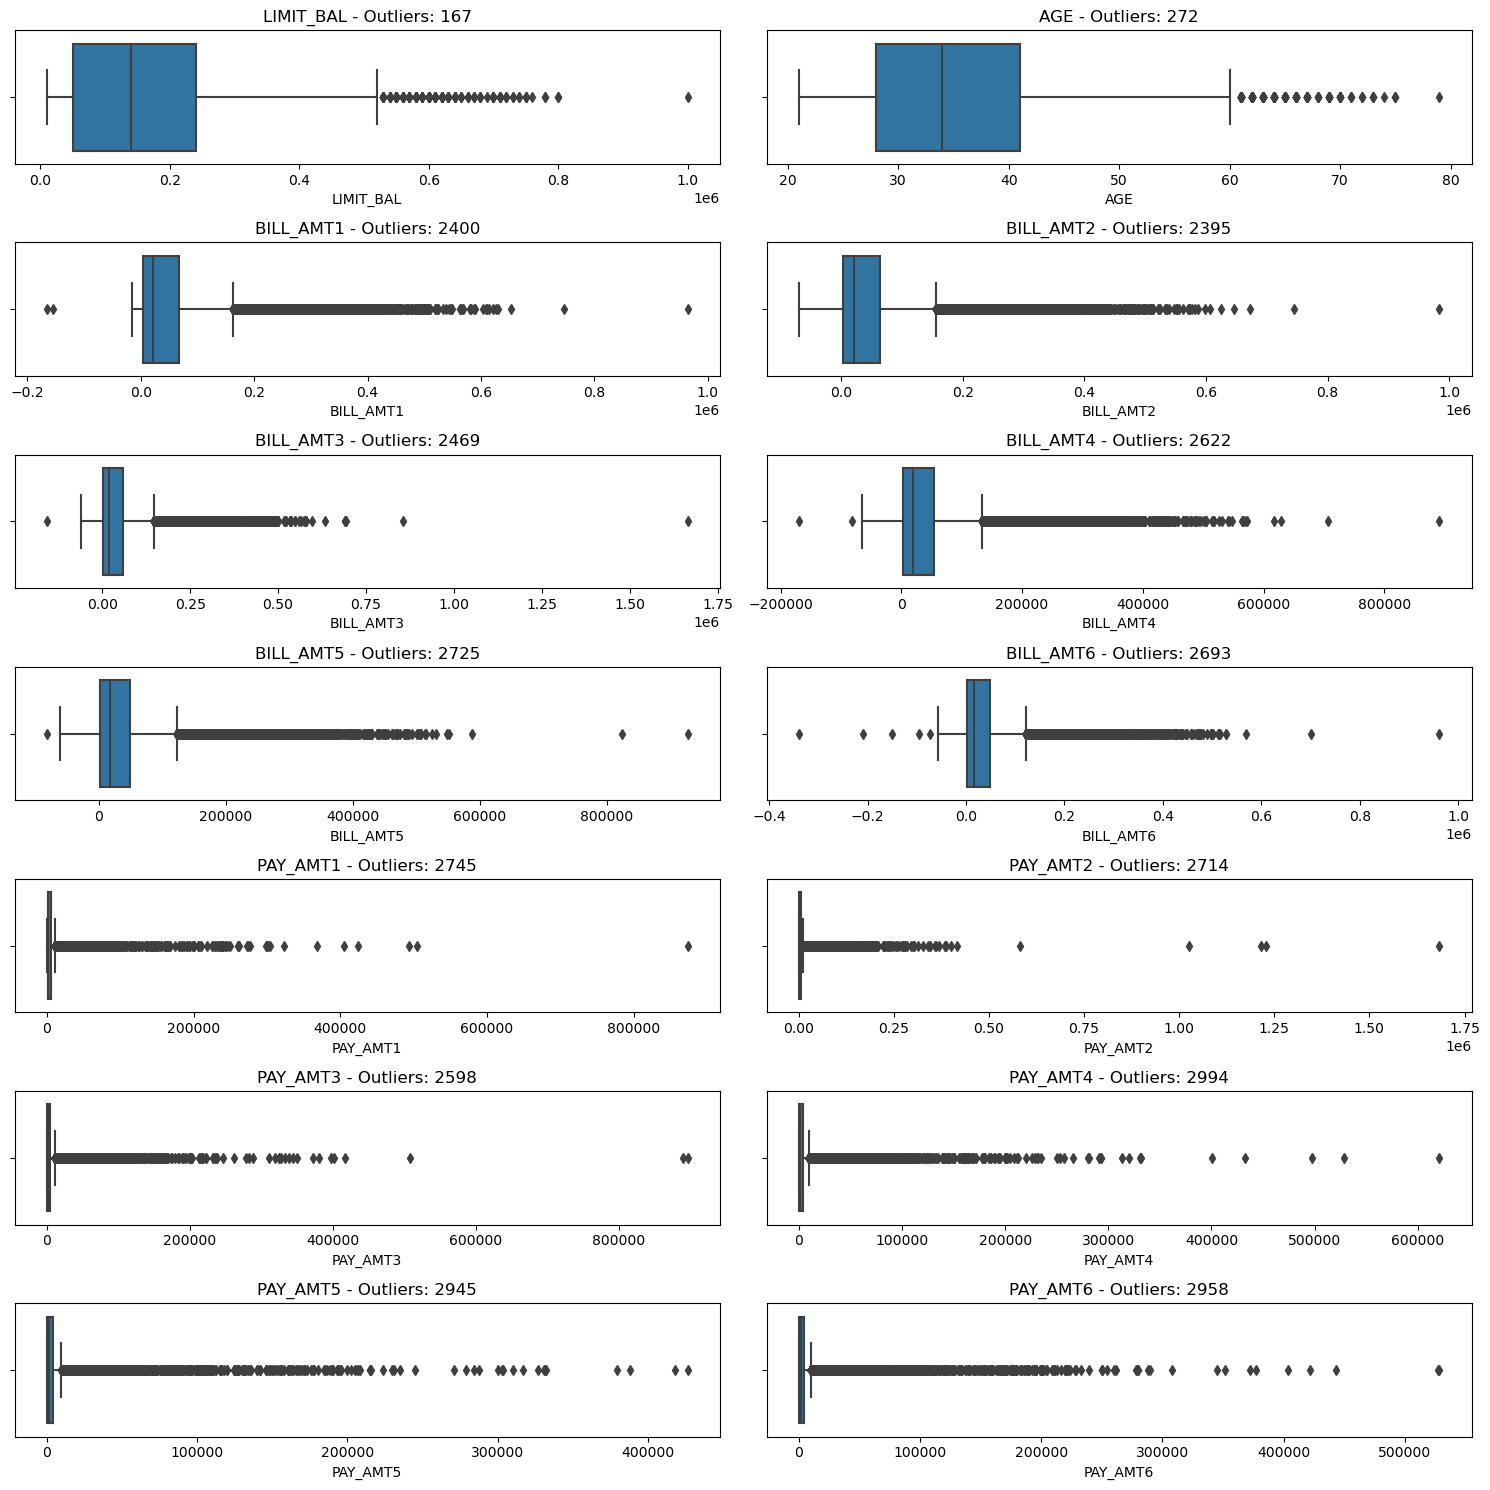

In [19]:
# Number of rows and columns for the grid of subplots
n_rows = 7
n_cols = 2

# Create a figure for all plots
plt.figure(figsize=(15, 15))  # Adjust the total size of the grid of plots

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Position each plot in the grid
    sns.boxplot(x=data[col])
    plt.title(f'{col} - Outliers: {identify_outliers(data, col)}')
    plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure

plt.show()

According to Outlier analysis we can identify:

- **Data Distribution:** Variables such as LIMIT_BAL and AGE show a relatively even distribution with outliers on the higher end. This might be typical in financial data where some clients have significantly higher credit limits or ages than most.

- **Bill Amount Variables (BILL_AMT1 - BILL_AMT6):** These variables display a large number of outliers on the upper end. This could indicate that there are clients with large amounts of debt relative to most, which is common in credit data.

- **Payment Amount Variables (PAY_AMT1 - PAY_AMT6):** Similar to the bill amounts, there are many outliers, suggesting that some clients make substantially higher payments than others. This too is common in financial data, as payment behavior can vary greatly among customers.

- **Potential Anomalies:** The outliers you see might be indicative of customers with financial behaviors that significantly differ from the general population, such as those who are deeply indebted or have high financial capability.

**Possible Explanations:**

- **High-Income Customers:** The outliers in LIMIT_BAL and payment amounts could reflect customers with high incomes or high credit capacity.
- **Temporal or Seasonal Changes:** Outliers in the bill and payment amount variables may be influenced by seasonal or temporal changes, such as spending during holidays or personal events.

#### 4.1.2. Categorical Variables

- **Dependent Variable:**

In [20]:
data['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

- **Independent Variable:**

In [21]:
# SEX:(1=male, 2=female)
data['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [22]:
# EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others)
data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

We have values for 0,5,6, which are not determined.

In [23]:
# MARRIAGE: (1=married, 2=single, 3=others)
data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

We have few values for 0, which are not determined 

In [24]:
# Delay of the past payment variables: 
#(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
#8=payment delay for eight months, 9=payment delay for nine months and above)
data['PAY_0'].value_counts()

PAY_0
0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: count, dtype: int64

We have few values for -2 and 0, which are not determined, let's randomly check two additional delay of the past payment variables to determine if the same is true for these variables.

In [25]:
data['PAY_3'].value_counts()

PAY_3
0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: count, dtype: int64

In [26]:
data['PAY_5'].value_counts()

PAY_5
0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: count, dtype: int64

According to the results we can determine that delay of the past payment variables have some anomalies in their data.

### 4.2. Distribution


Understanding the distribution of both categorical and numerical variables is crucial for effective data analysis. It informs about the data's spread, central tendencies, and potential patterns, enabling better-informed decisions. This insight aids in building accurate models, identifying trends, and ensuring the reliability of analytical results.

**4.2.1. Numerical variables**

We will create histograms or density plots to understand the distribution of numerical variables.

C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\4169120598.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\4169120598.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\4169120598.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\4169120598.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
C:\Users\Marcela\AppData\Local\Temp\ipykernel_6264\4169120598.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Automatically adjusts the subplots to fit in the fi

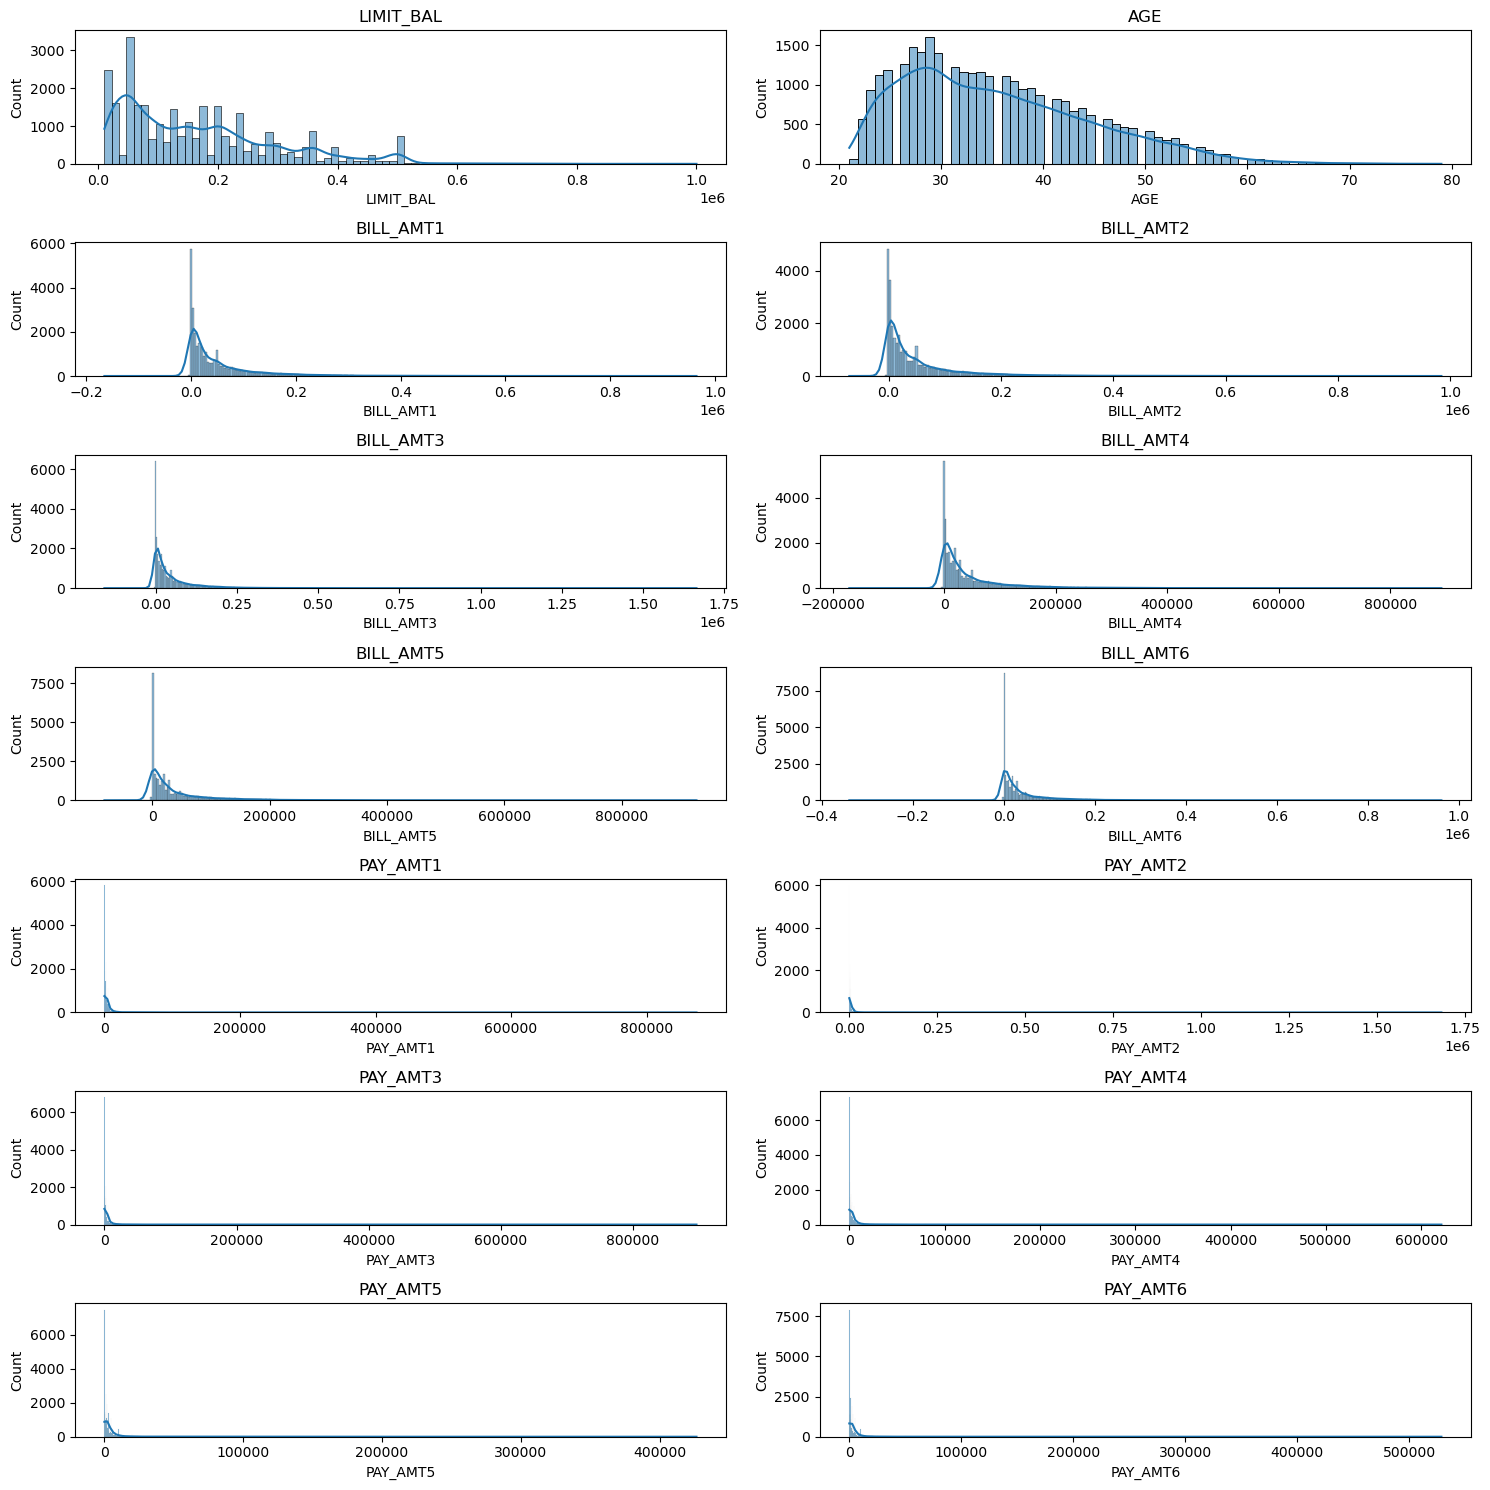

In [27]:
# Histograms for numerical variables

# Number of rows and columns for the subplot grid
n_rows = 7
n_cols = 2

# Create a figure for all histograms
plt.figure(figsize=(15, 15))  # Adjust the total size of the grid of plots

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Position each histogram in the grid
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.tight_layout()  # Automatically adjusts the subplots to fit in the figure
plt.show()# Show the figure with all histograms

The histogram allows us to visually inspect the distribution of numerical variables in the data set. Here is an analysis based on the displayed histograms:

- **LIMIT_BAL:** The distribution of credit limits (LIMIT_BAL) is right-skewed, meaning there are a number of clients with high credit limits, but the majority have lower credit limits. There is a long tail on the right, indicating some clients with significantly higher credit limits.

- **AGE:** The age distribution appears to be fairly uniform but slightly right-skewed, suggesting a younger customer base with a smaller proportion of older clients.

- **BILL_AMT1 to BILL_AMT6:** All of these bill statement amounts from April to September show a highly right-skewed distribution. The majority of clients have lower bill amounts, with a few clients having very high bill amounts, which are the outliers in each histogram.

- **PAY_AMT1 to PAY_AMT6:** Similar to the bill amounts, the payment amounts are also highly right-skewed. Most clients make smaller payments, with a few making very large payments.

**Overall Analysis:**

- The skewness in the distributions suggests that for most of the financial variables, there are a significant number of clients with lower credit activity (both in terms of billed amounts and payments), and a smaller number of clients with very high credit activity.
- The presence of outliers, especially in the financial variables (BILL_AMT and PAY_AMT), indicates that there might be some extreme values that could be due to high variation in clients' credit usage or data entry errors.

**4.2.2. Categorical variables**

We will generate bar charts for categorical variables to see the frequency of each category.

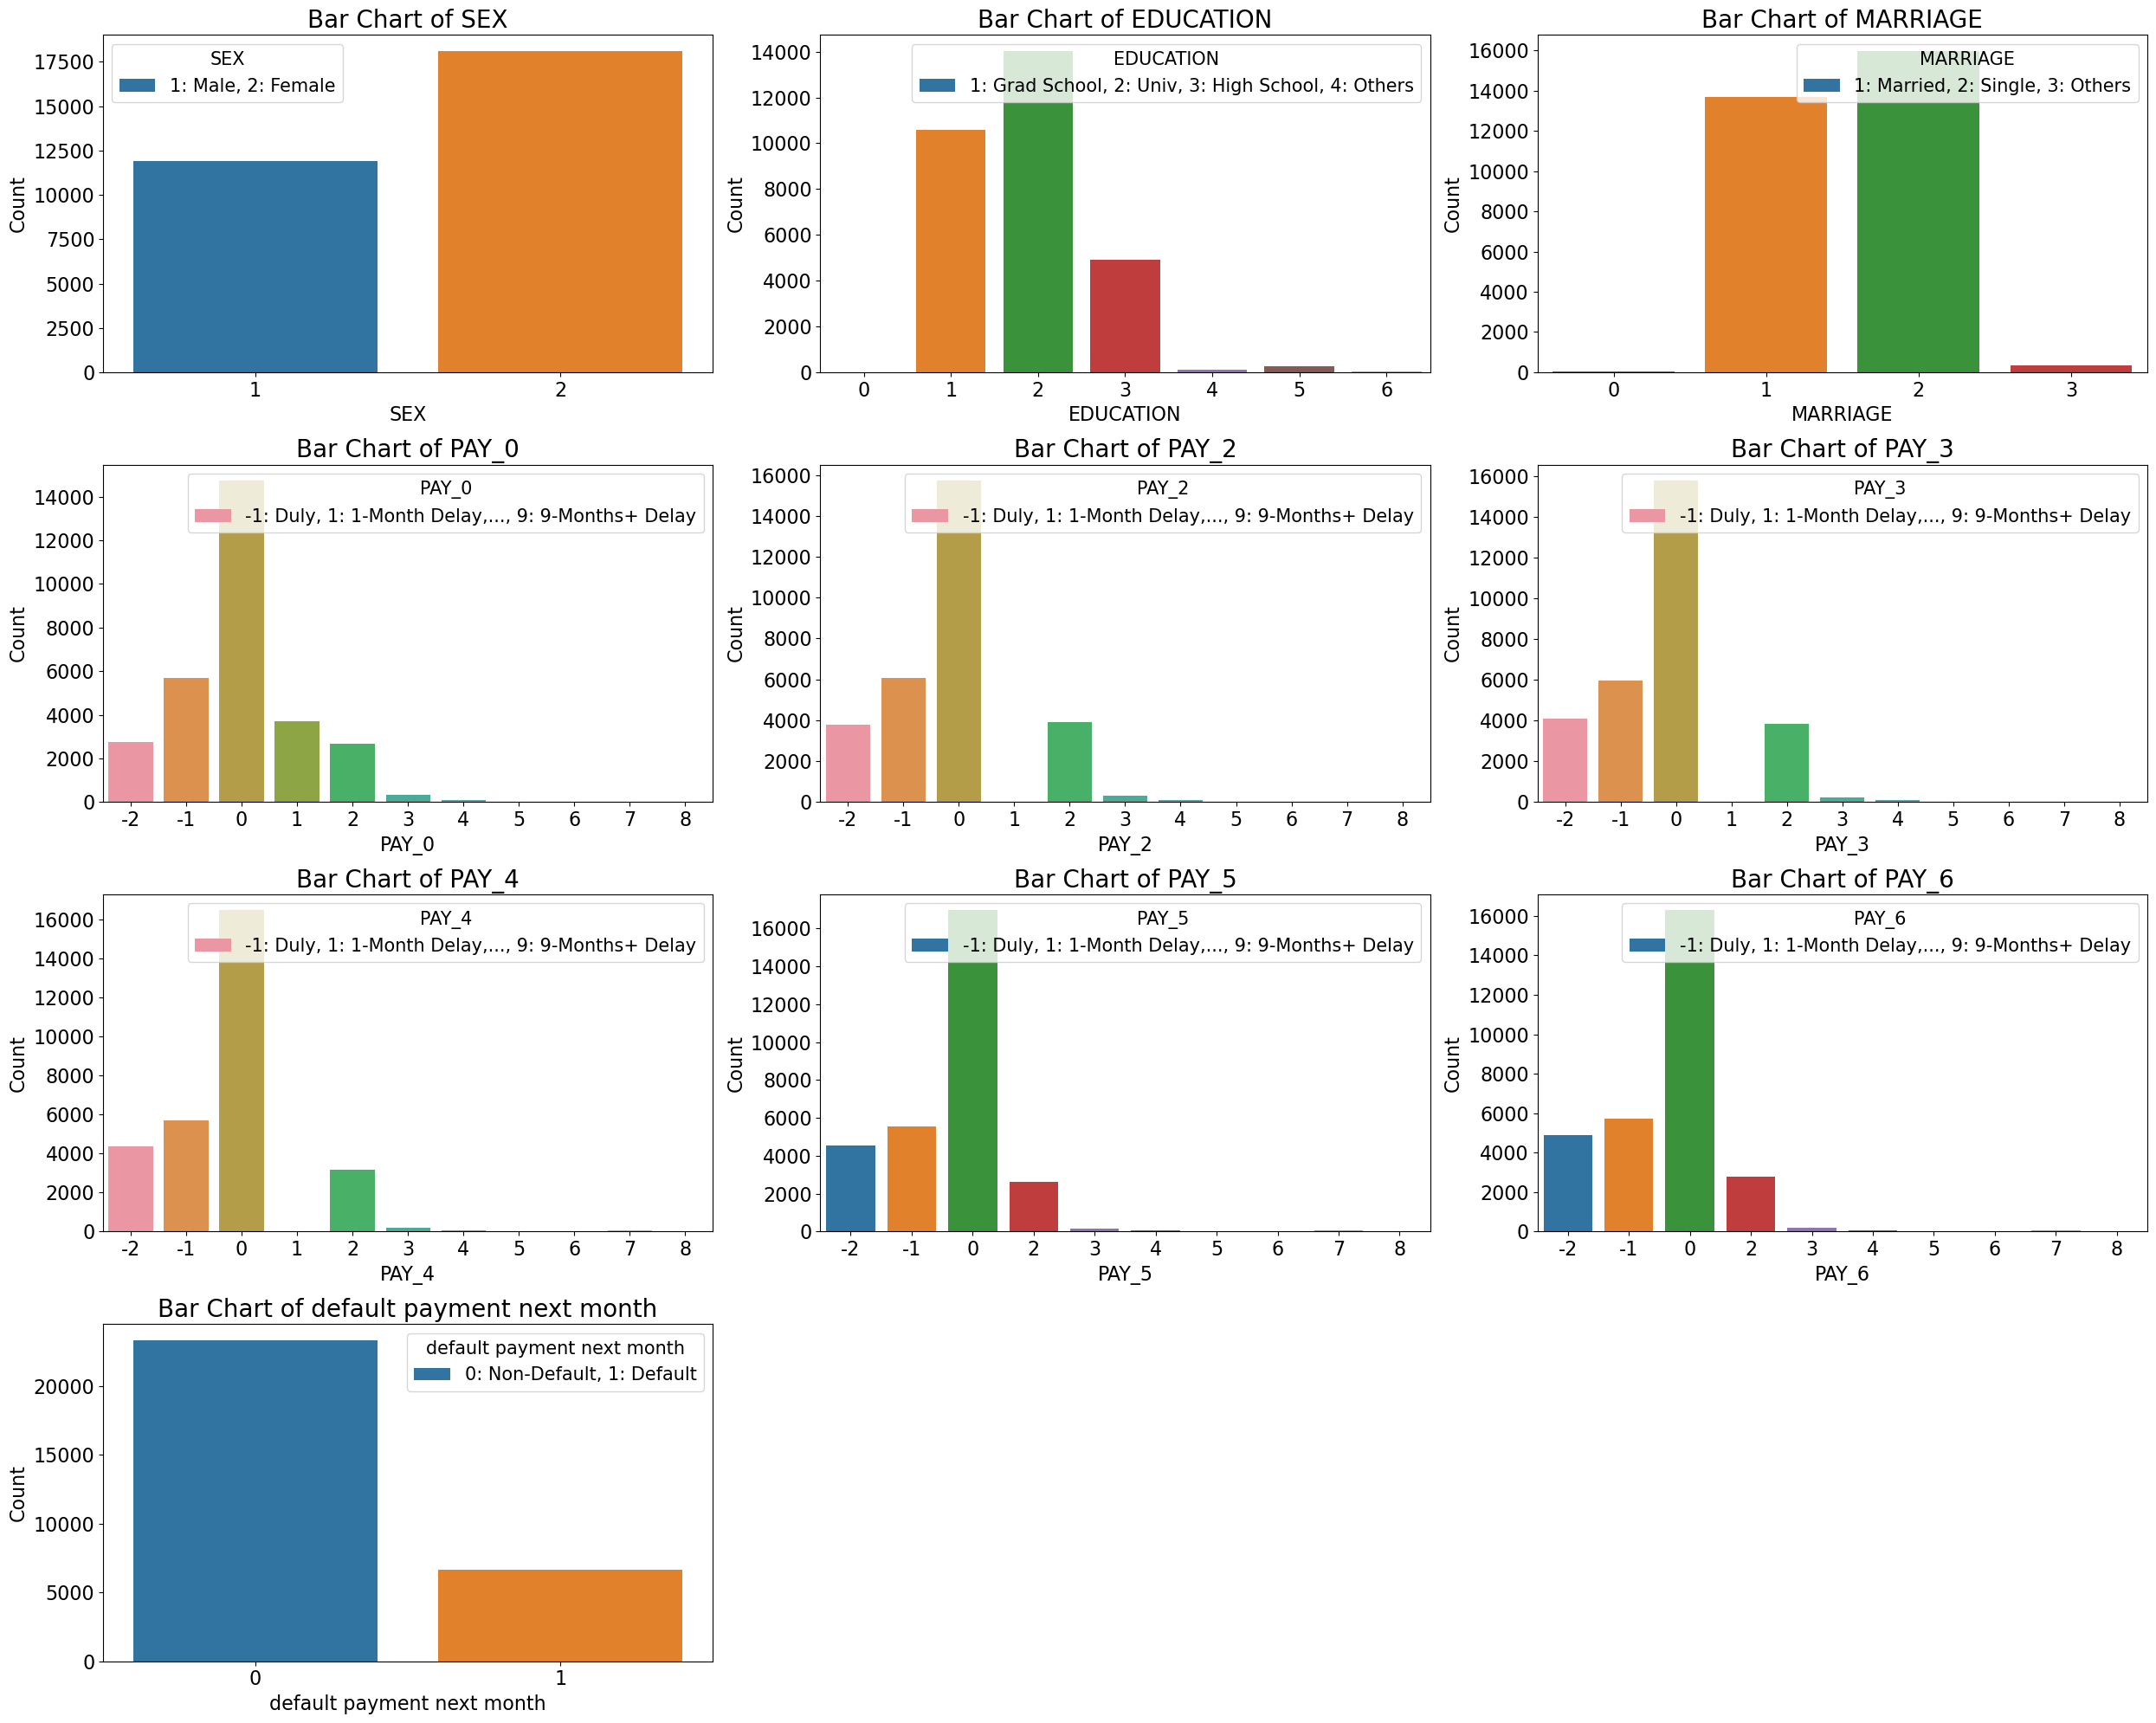

In [28]:
#categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']
# Define legends
legends = {
    'SEX': '1: Male, 2: Female',
    'EDUCATION': '1: Grad School, 2: Univ, 3: High School, 4: Others',
    'MARRIAGE': '1: Married, 2: Single, 3: Others',
    'PAY_0': '-1: Duly, 1: 1-Month Delay,..., 9: 9-Months+ Delay',
    'PAY_2': '-1: Duly, 1: 1-Month Delay,..., 9: 9-Months+ Delay',
    'PAY_3': '-1: Duly, 1: 1-Month Delay,..., 9: 9-Months+ Delay',
    'PAY_4': '-1: Duly, 1: 1-Month Delay,..., 9: 9-Months+ Delay',
    'PAY_5': '-1: Duly, 1: 1-Month Delay,..., 9: 9-Months+ Delay',
    'PAY_6': '-1: Duly, 1: 1-Month Delay,..., 9: 9-Months+ Delay', 
    'default payment next month': '0: Non-Default, 1: Default'
 }

# Define font sizes for titles and labels
title_fontsize = 20
label_fontsize = 16
ticks_fontsize = 16 
legend_fontsize = 15
title_fontsize_legend = 15

# Number of rows and columns for the subplot grid
n_rows = 4
n_cols = 3


# Create a figure for all bar plots
plt.figure(figsize=(25, 20))  # Adjust the total size of the grid of plots to accommodate legends

for i, col in enumerate(categorical_columns):
#for i, col in enumerate('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month'):    
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, data=data)
    plt.title(f'Bar Chart of {col}',fontsize=title_fontsize)# Adjust title size
    plt.xlabel(col, fontsize=label_fontsize)  # Adjust x-axis label size
    plt.ylabel('Count', fontsize=label_fontsize)# Adjust y-axis label size
    
    # Add custom legend to explain the categories
    ax.legend(title=col, labels=[legends[col]], fontsize=legend_fontsize, title_fontsize=title_fontsize_legend)

    
    # Adjust the tick label size
    plt.xticks(fontsize=ticks_fontsize)
    plt.yticks(fontsize=ticks_fontsize)

plt.tight_layout()# Automatically adjusts the subplots to fit in the figure
plt.show()

According to the bar graphs we can analyze:

- **SEX (Gender):** There is an almost equal distribution between men (1) and women (2), with a slight majority in the female gender.

- **EDUCATION (Education):** Most clients have attended college (2) or graduate school (1), with fewer clients reporting high school education (3) and a smaller number in the 'other' category (4) .

- **MARRIAGE (Marital Status):** The 'Single' (2) category appears to be the most prevalent, followed by 'Married' (1), with 'Other' (3) being the least common.

- **Default Payment Next Month (Next Month Payment Default):** A significant proportion of customers have not defaulted on their payments (0: 'Non-Default'), compared to those who have defaulted (1: 'Default'). This could indicate good credit management among the majority of customers in this data set.

**PAY_0 to PAY_6 (Payment History):**
- For all months, most customers have paid their bills on time, as indicated by the value -1 ("Duly").
- Payment delays are less common, with the number of customers decreasing as the length of the delay increases. This is consistent across all months from September (PAY_0) to April (PAY_6).
- Payments with significant delays (e.g. 2 months or more) are relatively rare, which is a positive sign of responsible payment behavior in general.
- We continue to identify anomalies for category -2 and 0 that are not classified in the dataset, representing an important participation in the variables.






### 5. Variable Selection

Variable selection is the process of determining which variables are the most relevant for predicting the probability of credit card default. This may include:

### 5.1. Correlation Analysis: 

Identify and discard variables that are highly correlated with each other.

In [29]:
# Calculate the correlation matrix for the standardized numerical variables
correlation_matrix = data[numeric_columns].corr()

In [30]:
# Create a mask to hide the upper diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

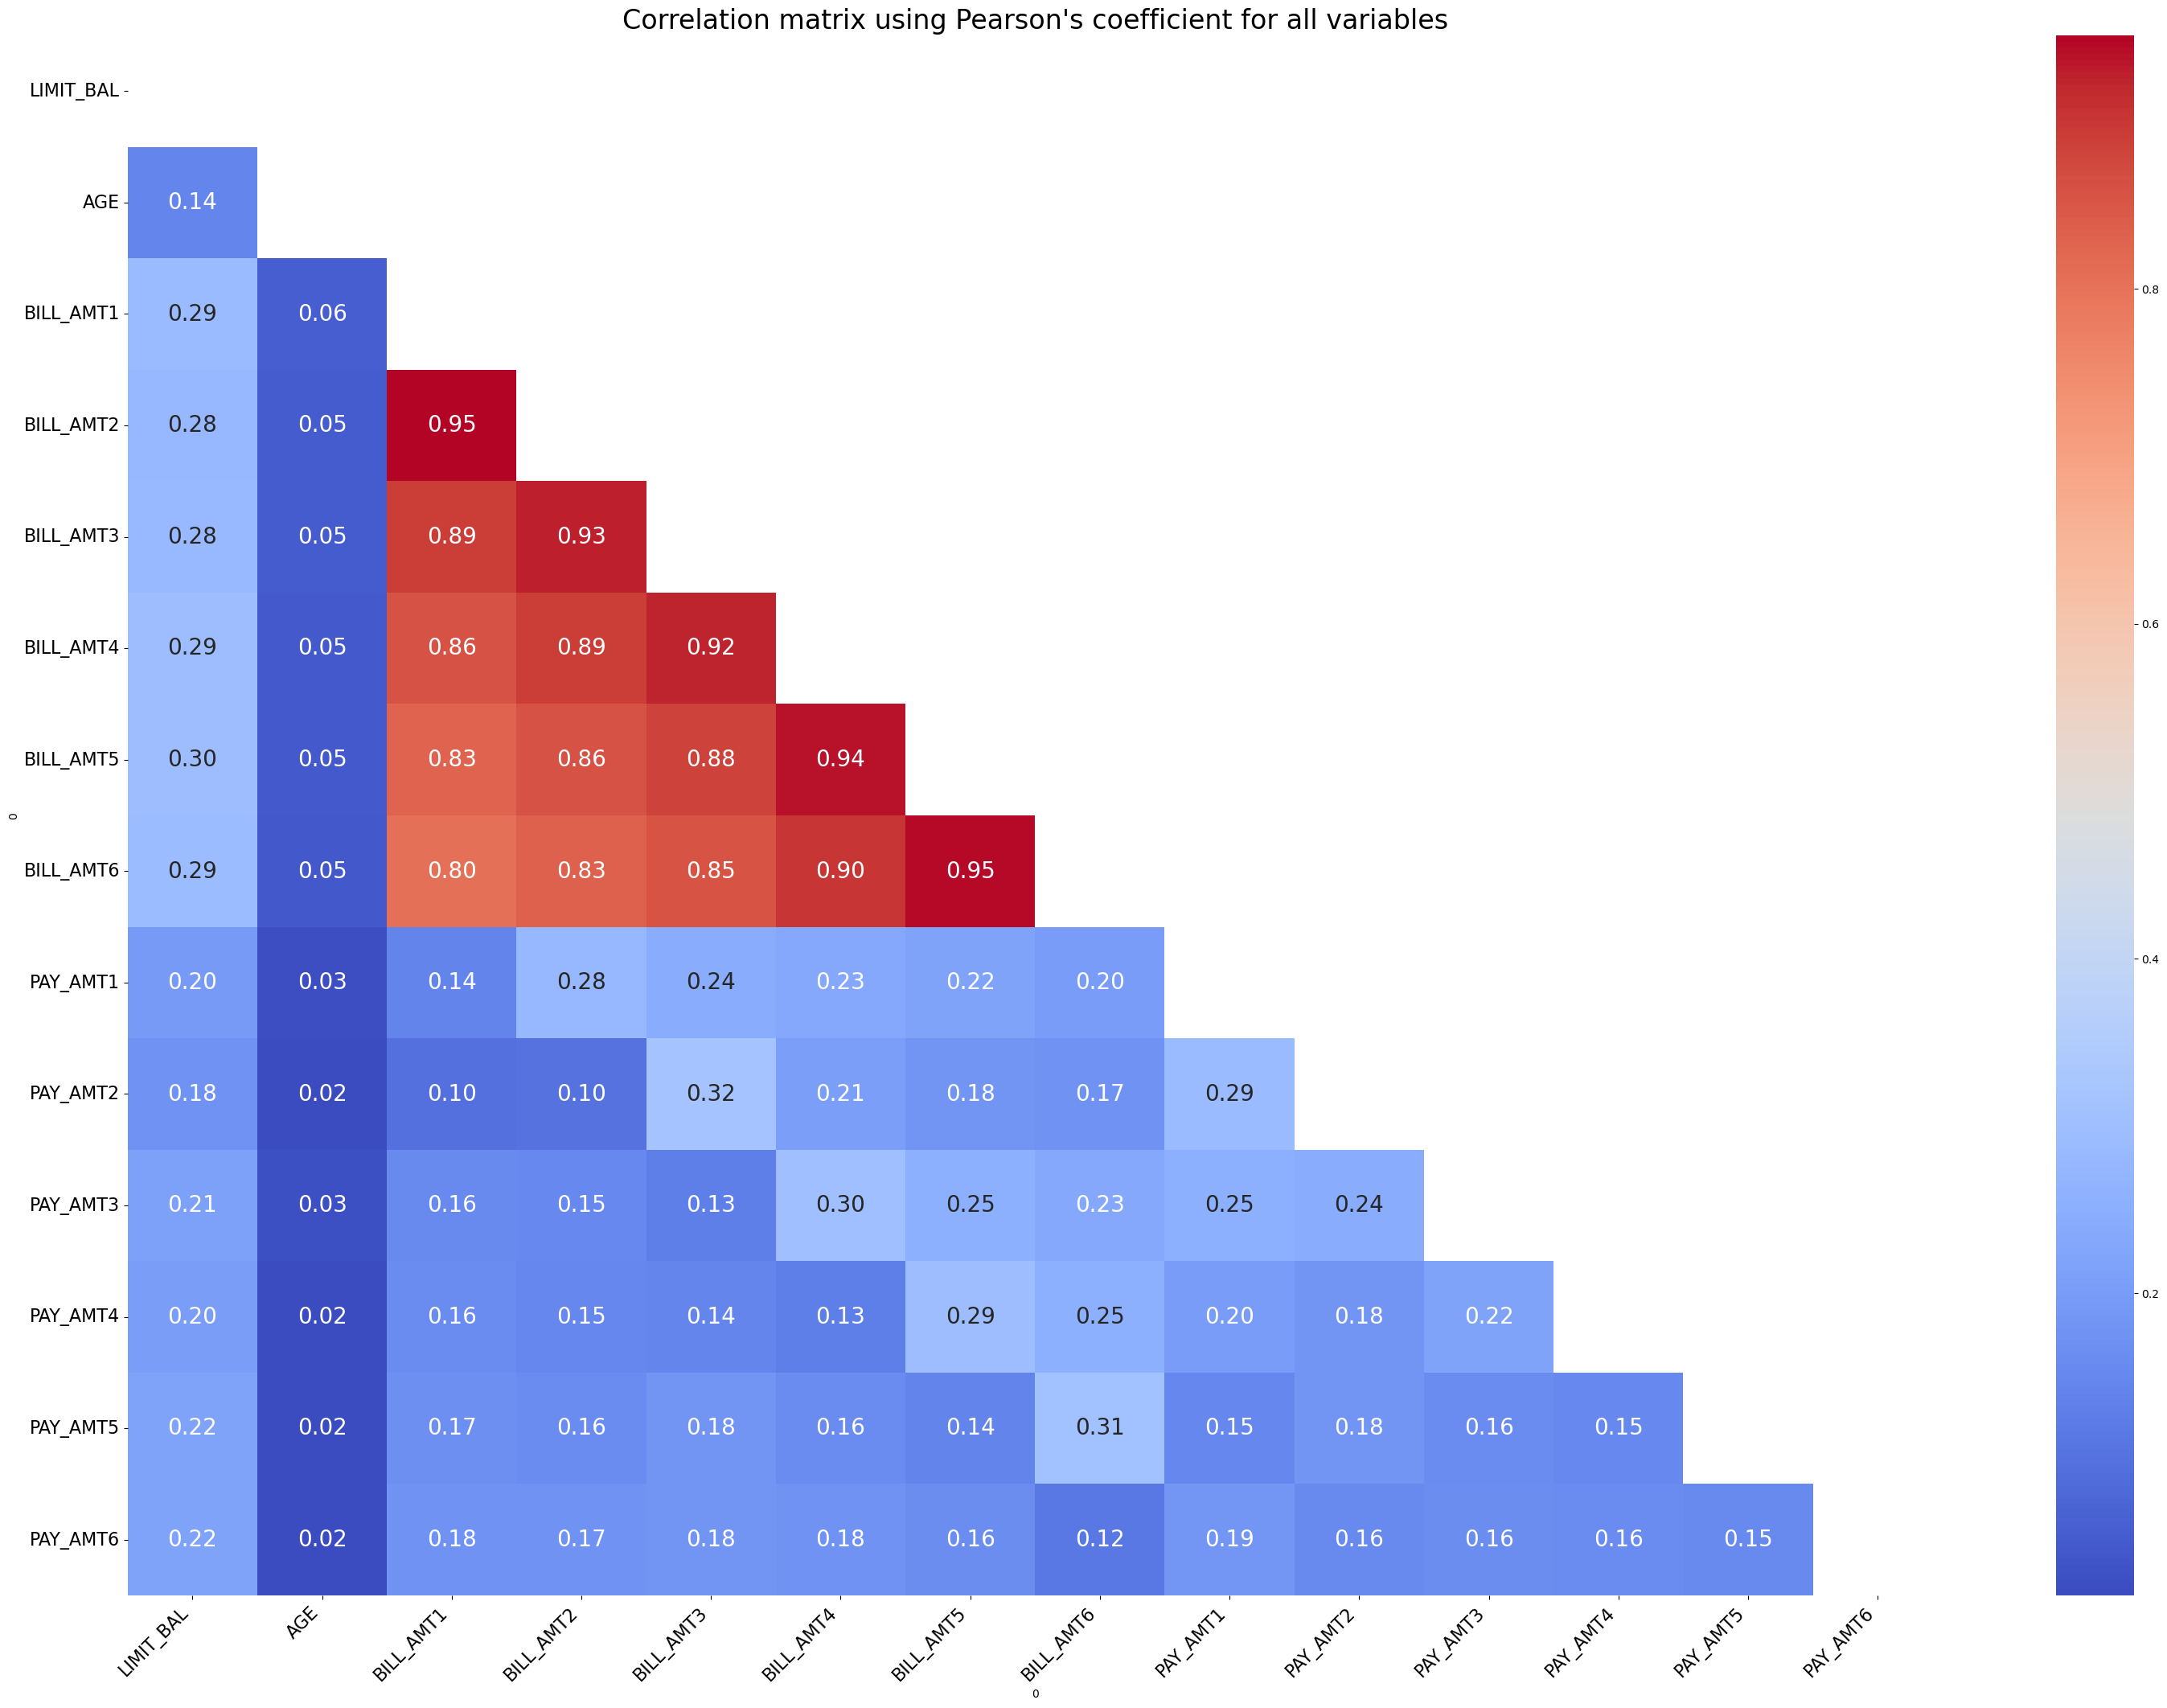

In [31]:
# Display the correlation matrix
plt.figure(figsize=(30, 21))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 20})
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout() # Automatically adjusts the subplot parameters

plt.title("Correlation matrix using Pearson's coefficient for all variables",fontsize=24)
plt.show()

When examining the correlation matrix, several pairs of variables show high correlation coefficients, suggesting a strong linear relationship between them. These pairs include:

- The variables related to the amounts of the bills **(BILL_AMT1 to BILL_AMT6)** demonstrate a substantial correlation among themselves, indicating that the amounts of the bills in consecutive months are tightly interconnected.

Given this high correlation between consecutive billing and payment variables, it may be prudent to consider the elimination of some of these variables to reduce redundancy in the model.

### 5.1.1. Eliminate highly correlated variables

A common strategy is to eliminate one variable from each highly correlated pair, preferably the one that has a higher average correlation with the rest of the variables in the dataset, as this indicates greater redundancy. By doing so, the model will be simplified, and performance metrics could be improved by avoiding the issue of multicollinearity.

To implement this, we must first identify the pairs with a correlation above a specific threshold (such as 0.9), and then, from each pair, remove the variable with the highest average correlation.

In [32]:
# Establishes a threshold for high correlation
high_corr_threshold = 0.9

In [33]:
# Find pairs of highly correlated variables
highly_correlated_pairs = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            col_name = correlation_matrix.columns[i]
            row_name = correlation_matrix.index[j]
            highly_correlated_pairs[(col_name, row_name)] = correlation_matrix.iloc[i, j]

In [34]:
# Convert the dictionary to DataFrame for better visualization
high_corr_pairs_data = pd.DataFrame(list(highly_correlated_pairs.items()), columns=['Variable Pair', 'Correlation'])

In [35]:
# Shows pairs of highly correlated variables
print(high_corr_pairs_data)

            Variable Pair  Correlation
0  (BILL_AMT2, BILL_AMT1)     0.951484
1  (BILL_AMT3, BILL_AMT2)     0.928326
2  (BILL_AMT4, BILL_AMT3)     0.923969
3  (BILL_AMT5, BILL_AMT4)     0.940134
4  (BILL_AMT6, BILL_AMT4)     0.900941
5  (BILL_AMT6, BILL_AMT5)     0.946197


In [36]:
# Calculates the average correlation of each variable with other variables
avg_corr = correlation_matrix.abs().sum() - 1  # Subtract 1 to exclude autocorrelation

In [37]:
# Create a list to store the variables to be deleted
vars_to_drop = set()

In [38]:
# Iterate through the highly correlated pairs and decide which to eliminate
for (var1, var2), corr_value in highly_correlated_pairs.items():
    # If any of the variables are already in the list to delete, continue with
    if var1 in vars_to_drop or var2 in vars_to_drop:
        continue
    
    # Compares the average correlation of the two variables and eliminates the one with the highest average correlation
    if avg_corr[var1] > avg_corr[var2]:
        vars_to_drop.add(var1)
    else:
        vars_to_drop.add(var2)

In [39]:
# Removes the selected variables from the DataFrame
data_reduced = data.drop(columns=vars_to_drop)

In [40]:
# List of eliminated variables
vars_eliminated = list(vars_to_drop)

In [41]:
# Shows the variables to be suggested for deletion
vars_eliminated

['BILL_AMT4', 'BILL_AMT2', 'BILL_AMT5']

In [42]:
#New numerica variables after eliminated variables highly correlated
numeric_columns2 = ['ID','LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT3','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                   'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [43]:
# Calculate the correlation matrix after eliminated variables
correlation_matrix2 = data_reduced[numeric_columns2].corr()

In [44]:
# Create a new mask to hide the upper diagonal
mask = np.triu(np.ones_like(correlation_matrix2, dtype=bool))

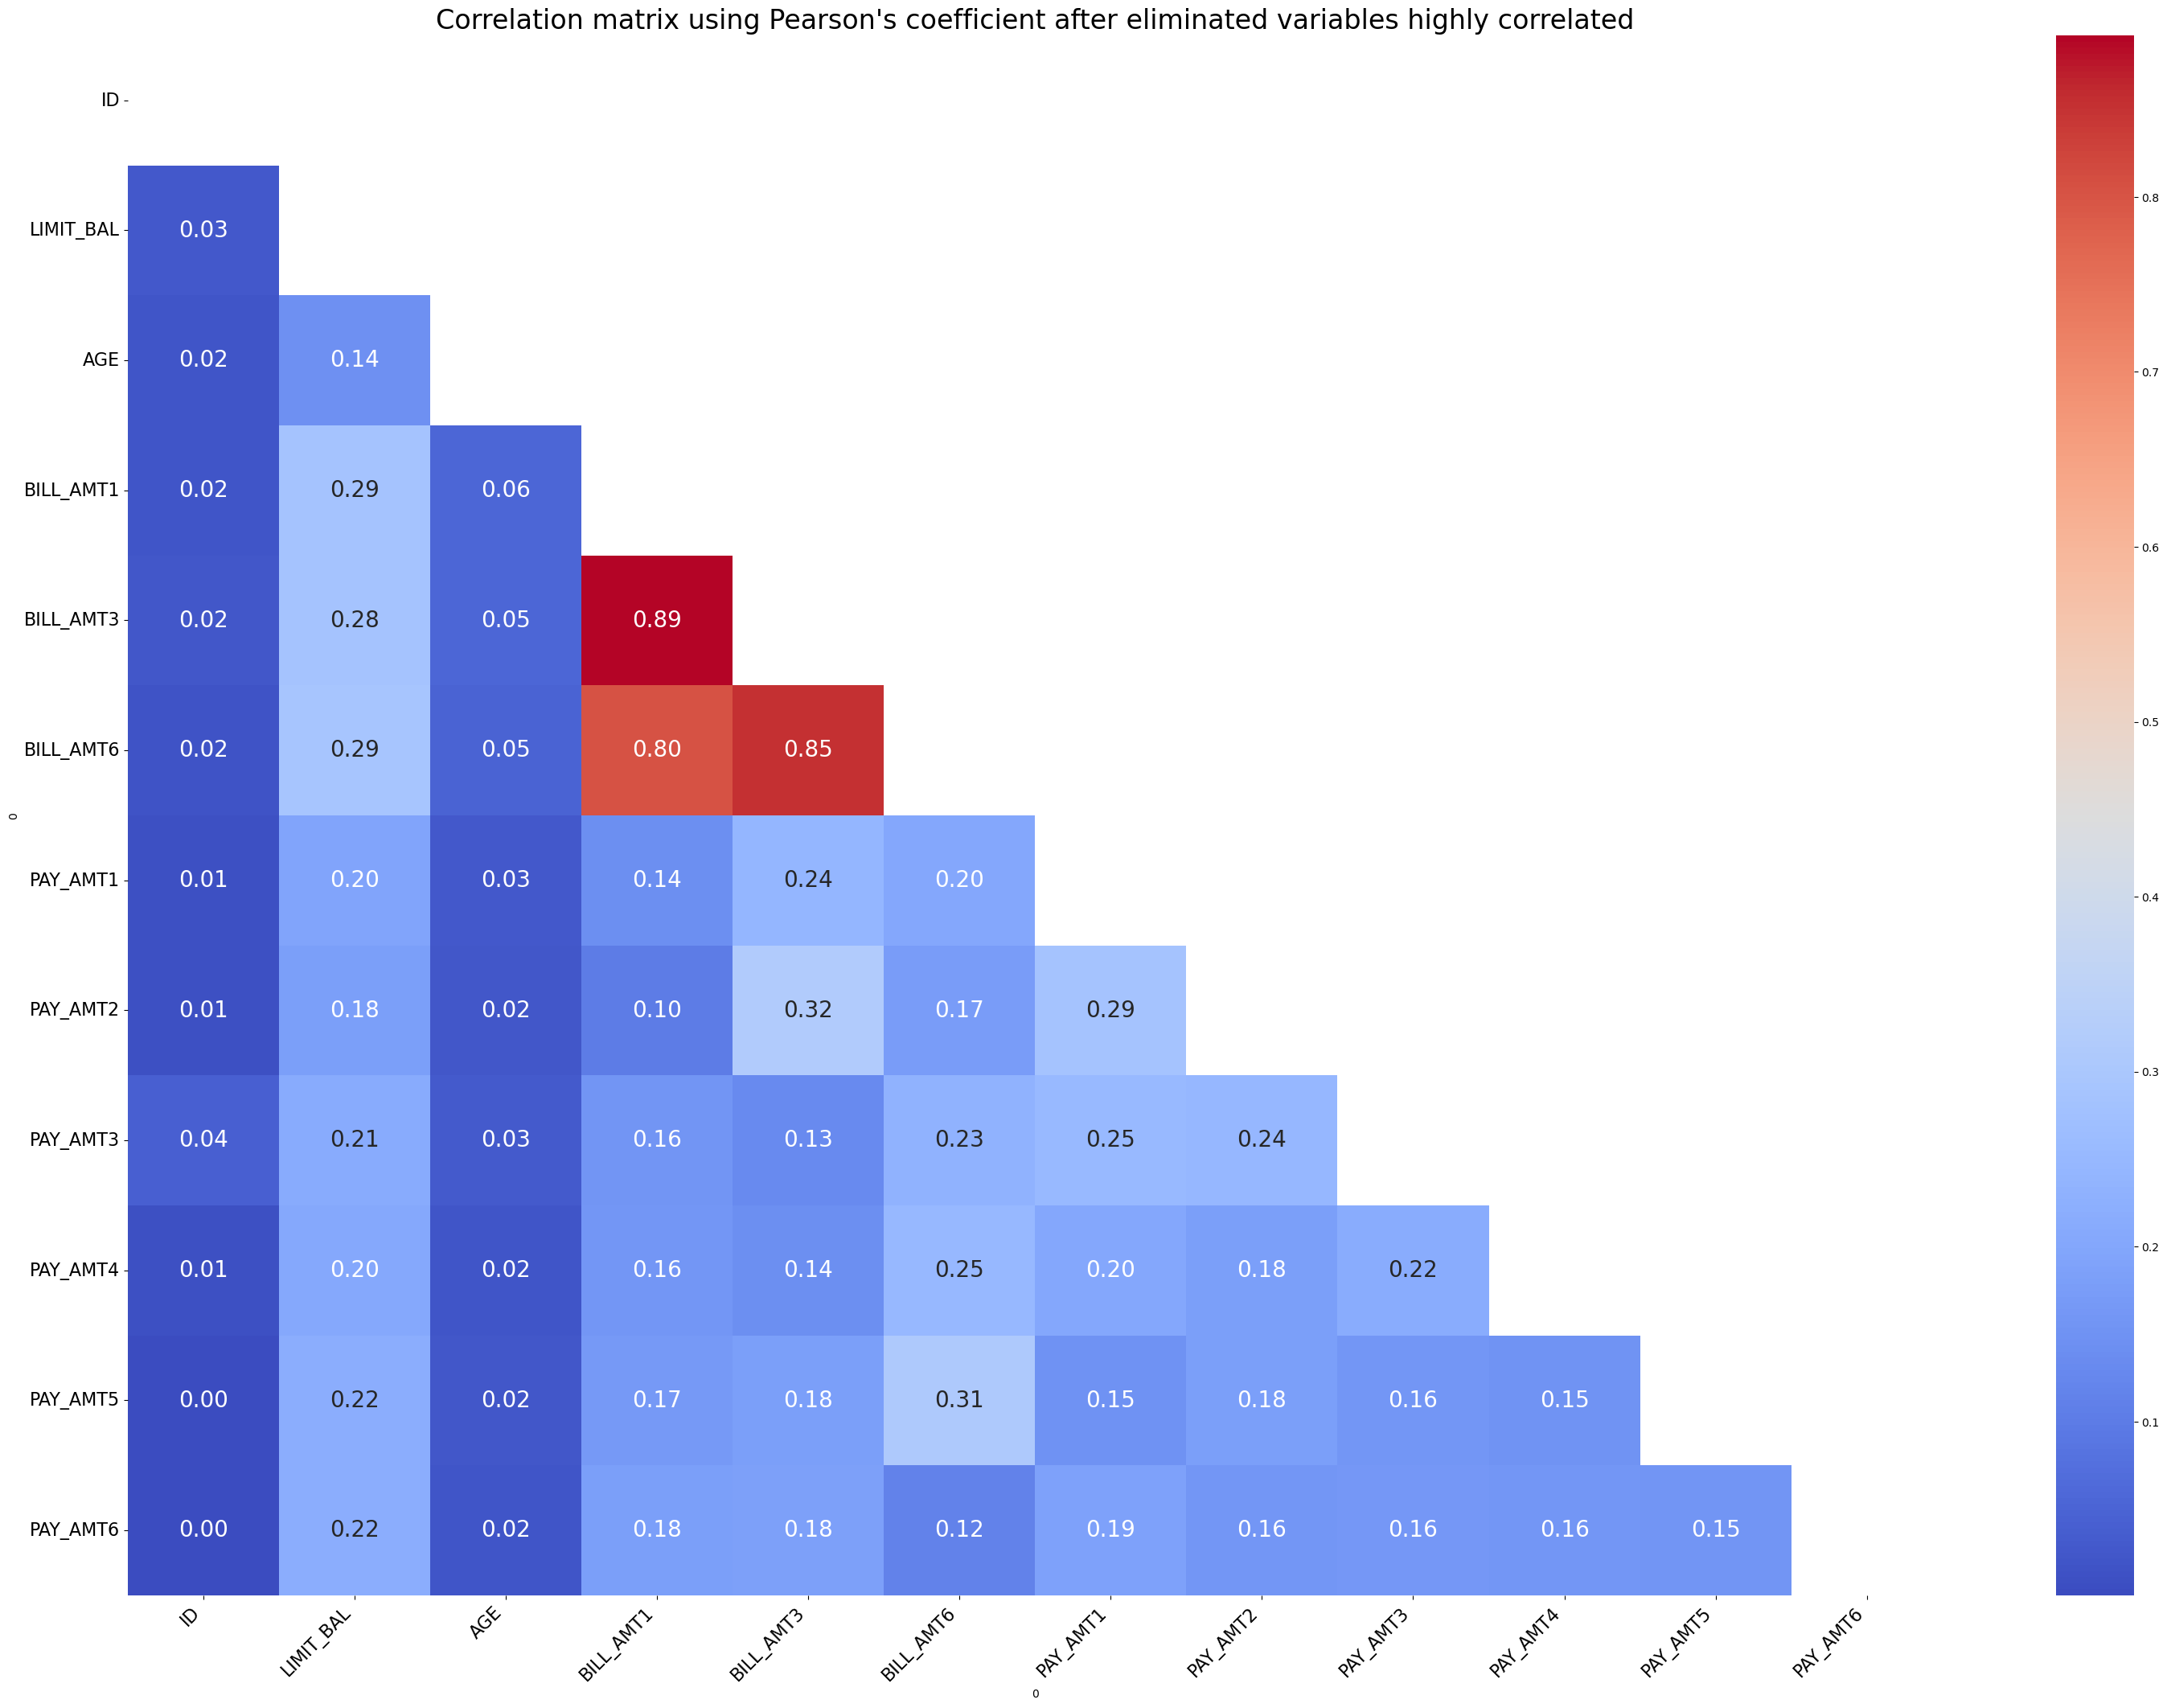

In [45]:
# Display the new correlation matrix
plt.figure(figsize=(30, 21))
sns.heatmap(correlation_matrix2, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 20})
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout() # Automatically adjusts the subplot parameters

plt.title("Correlation matrix using Pearson's coefficient after eliminated variables highly correlated",fontsize=24)
plt.show()

### 6. Data Transformation

Data transformation is a crucial step in preparing the dataset for modeling.

### 6.1. Handling of outliers or anomalous values

**6.1.1. Handling of outliers in numerical variables:**

- In the analysis of predicting the probability of default on credit card payments, it is crucial to consider outliers not as errors, but as manifestations of significant financial behaviors. 

- These values, especially in variables such as LIMIT_BAL, BILL_AMT1 to BILL_AMT6, and PAY_AMT1 to PAY_AMT6, may reflect actual situations of customers with high credit limits or unusual spending and payment patterns, crucial for identifying potential defaults. 

- The variability observed in this data is common in the financial area and may be indicative of default risks, either due to high levels of indebtedness or irregular payment patterns. 

- Therefore, rather than removing or limiting these values, it would be more appropriate to employ machine learning models that are robust to outliers, such as decision trees or random forests. This will allow a more accurate assessment of default risk, while maintaining the integrity and diversity of financial behaviors reflected in the data.

**6.1.2. Handling of anomalies in categorical variables:**

In the exploratory data analysis, **unknown categories** were identified in key categorical variables such as **EDUCATION**, **MARRIAGE**, and the **PAY_0 to PAY_6 series**, where certain values were not previously defined. Since these values represent a significant proportion of the data and it cannot be determined whether they are errors or misclassified categories, the most prudent strategy is to reclassify them as "Unknown". This decision is based on several factors:

- **Preservation of Data Integrity:** By classifying these values as "Unknown", the integrity of the dataset is maintained without making potentially erroneous assumptions about their nature.

- **Significant Impact on Analysis:** These unknown values can have a substantial impact on the prediction of default. Eliminating or mishandling them could bias the model results.

- **Importance in Predicting Behavior:** Specifically for variables PAY_0 to PAY_6, which indicate payment history, the presence of undefined categories could be indicative of unique payment patterns or irregularities that are crucial for predicting default.

- **Modeling Flexibility:** By treating these values as "Unknown", you provide machine learning models the opportunity to identify patterns that may be unique to these groups, which could be valuable for analysis.

### 7. Modeling Approach

### 7.1. Standardization and coding

- #### Standardization of Numerical Variables:

Standardization (or Z-score normalization) scales the data to have a mean of 0 and a standard deviation of 1. It is less sensitive to outliers and is often preferred in contexts where outliers are important or when using algorithms that assume the data are normally distributed, as in many machine learning techniques.

In [46]:
# Creating the StandardScaler object
scaler = StandardScaler()

# Applying standardization to the numerical columns
data_reduced[numeric_columns2] = scaler.fit_transform(data_reduced[numeric_columns2])

# Showing the first rows of the dataset after standardization
data_reduced[numeric_columns2].head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,-1.731993,-1.136720,-1.246020,-0.642501,-0.667993,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
2,-1.731878,-0.365981,-1.029047,-0.659219,-0.639254,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
3,-1.731762,-0.597202,-0.161156,-0.298560,-0.482408,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
4,-1.731647,-0.905498,0.164303,-0.057491,0.032846,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
5,-1.731531,-0.905498,2.334029,-0.578618,-0.161189,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


- #### Coding of Categorical Variables:

**One-Hot coding** converts each unique category into a new column and assigns a value of 1 or 0 (presence or absence of the category). This technique is useful for machine learning models that require numerical inputs and cannot directly interpret categorical data.

- The variables **SEX, EDUCATION** and **MARRIAGE** are categorical variables, although some are represented numerically (such as 1 for male, 2 for female in SEX).

- In the case of **PAY_0 to PAY_6**, they are categorical variables that represent categories of payment status although they are represented numerically.

Therefore, these variables are treated as categorical variables even though they are represented numerically and One-Hot coding will be applied.

In [47]:
# Define categorical variables without the target variable (Y) 
#Because it is a binary variable (categorical with two categories)

categorical_columns2 = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] 

# Apply One-Hot coding
data_encoded = pd.get_dummies(data_reduced, columns=categorical_columns2)

# Showing the first rows of the encoded dataset
data_encoded.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
1,-1.731993,-1.136720,-1.246020,-0.642501,-0.667993,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,...,True,False,False,False,False,False,False,False,False,False
2,-1.731878,-0.365981,-1.029047,-0.659219,-0.639254,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,...,False,False,False,True,False,False,False,False,False,False
3,-1.731762,-0.597202,-0.161156,-0.298560,-0.482408,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,...,False,False,True,False,False,False,False,False,False,False
4,-1.731647,-0.905498,0.164303,-0.057491,0.032846,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,...,False,False,True,False,False,False,False,False,False,False
5,-1.731531,-0.905498,2.334029,-0.578618,-0.161189,-0.331482,-0.221191,1.335034,0.271165,0.266434,...,False,False,True,False,False,False,False,False,False,False


### 7.2. Model Training

### 7.2.1. Logistic Regression

- Logistic Regression is a statistical model that estimates the probability of a binary variable. It is particularly useful in binary classification problems such as the one in this project where the aim is to predict credit card default.

- This model is chosen for its simplicity and high interpretability. It is a good starting point for establishing a baseline because of its effectiveness in showing the direct relationship between the independent variables and the probability of default.

#### Split the data into training and test sets with standardization and coding

In [48]:
# Prepare the dataset
Xlr = data_encoded.drop(['ID', 'default payment next month'], axis=1)# Independent variables
ylr = data_encoded['default payment next month']# Dependent variable

In [49]:
# Split the data into training and test sets
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(Xlr, ylr, test_size=0.2, random_state=42)

In [50]:
# Create and train the logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_trainlr, y_trainlr)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
# Making predictions on the test set
lr_predictions = lr_model.predict(X_testlr)

In [52]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_testlr, lr_predictions))
print("Accuracy:", accuracy_score(y_testlr, lr_predictions))
print("AUC-ROC:", roc_auc_score(y_testlr, lr_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.34      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.8185
AUC-ROC: 0.6478023103881018


The logistic regression model achieves an accuracy of 81.85% but struggles to identify instances of default (class 1), as reflected in lower precision, recall, and F1-score for this class. The AUC-ROC of 0.65 suggests moderate discrimination ability. Further refinement may be needed to enhance predictive performance, especially in predicting credit card defaults.

### 7.3.2. Random Forest

- Random Forest is a decision tree-based model that uses ensemble to improve accuracy and avoid overfitting.

- This model is chosen for its robustness and ability to handle a large number of input variables. It can capture nonlinear and complex relationships between variables.

#### Split the data into training and test sets without standardization and coding

In [53]:
# Prepare the dataset
Xrf = data_reduced.drop(['ID', 'default payment next month'], axis=1)# Independent variables
yrf = data_reduced['default payment next month']# Dependent variable

In [54]:
# Split the data into training and test sets
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(Xrf, yrf, test_size=0.2, random_state=42)

In [55]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_trainrf, y_trainrf)

RandomForestClassifier(random_state=42)

In [56]:
# Making predictions on the test set
rf_predictions = rf_model.predict(X_testrf)

In [57]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_testrf, rf_predictions))
print("Accuracy:", accuracy_score(y_testrf, rf_predictions))
print("AUC-ROC:", roc_auc_score(y_testrf, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.8183333333333334
AUC-ROC: 0.6570160273810776


The initial random forest model achieves an accuracy of 81.83% with improvements needed in predicting instances of default (class 1). Precision, recall, and F1-score for class 1 indicate room for enhancement. The AUC-ROC of 0.66 suggests moderate discrimination ability. Further optimization through hyperparameter tuning and cross-validation may enhance the model's performance, particularly in predicting credit card defaults.

### 7.3.3. Gradient Boosting Machines (GBM) / XGBoost

- XGBoost is an advanced implementation of GBM that is known for its efficiency, accuracy and performance in data science competitions.

- This Model is selected for its high performance in classification tasks and its ability to automatically handle categorical variables.

#### Split the data into training and test sets without standardization and coding

In [58]:
# Prepare the dataset
Xgbm = data_encoded.drop(['ID', 'default payment next month'], axis=1)# Independent variables
ygbm = data_encoded['default payment next month']# Dependent variable

In [59]:
# Split the data into training and test sets
X_traingbm, X_testgbm, y_traingbm, y_testgbm = train_test_split(Xgbm, ygbm, test_size=0.2, random_state=42)

In [60]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_traingbm, y_traingbm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [61]:
# Making predictions on the test set
xgb_predictions = xgb_model.predict(X_testgbm)

In [62]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_testgbm, xgb_predictions))
print("Accuracy:", accuracy_score(y_testgbm, xgb_predictions))
print("AUC-ROC:", roc_auc_score(y_testgbm, xgb_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.8183333333333334
AUC-ROC: 0.6548229932543401


The initial Gradient Boosting Machines (GBM) / XGBoost model achieves an accuracy of 81.83%. While accurately predicting non-default instances, it struggles with instances of default (class 1), as indicated by lower precision, recall, and F1-score for this class. The AUC-ROC of 0.65 suggests moderate discrimination ability. Further optimization through hyperparameter tuning and cross-validation may enhance its predictive performance.

### 8. Model Validation and Evaluation

- **Hyperparameter Tuning:** Hyperparameer Tuning involves finding the optimal combination of hyperparameters that improves model performance. It is crucial to optimize the model prior to final evaluation. It is performed to ensure that the model being evaluated is the best possible within the limits of the chosen algorithm.

- **Cross-Validation:** Cross-validation is a technique for evaluating the generalization of a model to an independent data set. It involves dividing the data set into several subsamples and using some to train the model and others to validate it. It is an integral part of model evaluation, as it provides a more robust estimate of its performance on unseen data. It helps to identify problems of overfitting or underfitting and is useful in the model selection process.

- **Overfitting Handling:** Overfitting Handling refers to the implementation of strategies to prevent a model from learning too much of the details and noise in the training set, which could lead to poor performance on unseen data. An overfitted model may perform excellently on the training set but fail to generalize to new data. 


### 8.1. Logistic Regression

- **Hyperparameter Tuning:** 

In [63]:
# Define the range of hyperparameters to test
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [64]:
# Create the GridSearchCV object
# Use lr_model as the base model, test different 'C' values, with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1)

In [65]:
# Perform the hyperparameter search on the training data
grid_search.fit(X_trainlr, y_trainlr)

C:\Users\Marcela\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [66]:
# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 1000}


In [67]:
# Use the best model found for predictions
best_lr_model = grid_search.best_estimator_
lr_predictions = best_lr_model.predict(X_testlr)
lr_probabilities = best_lr_model.predict_proba(X_testlr)[:, 1]
auc_roc = roc_auc_score(y_testlr, lr_probabilities)

In [68]:
# Evaluate the tuned model (You can use your preferred evaluation metrics)
print("Classification Report:")
print(classification_report(y_testlr, lr_predictions))
print("Accuracy:", accuracy_score(y_testlr, lr_predictions))
print("AUC-ROC:", auc_roc)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.34      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.8186666666666667
AUC-ROC: 0.7641839958232256


After hyperparameter tuning, the logistic regression model sees a slight improvement in its ability to identify instances of default (class 1). The precision, recall, and F1-score for class 1 show marginal increases, and the AUC-ROC improves significantly to 0.76. This indicates enhanced discrimination ability and a better balance between precision and recall for predicting credit card defaults.

- **Cross-Validation:**

In [69]:
# Use the best model obtained from GridSearchCV
best_lr_model = grid_search.best_estimator_

In [70]:
# Perform cross-validation for accuracy
cv_accuracy_scores = cross_val_score(best_lr_model, Xlr, ylr, cv=5, scoring='accuracy')

# Perform cross-validation for AUC-ROC
cv_auc_scores = cross_val_score(best_lr_model, Xlr, ylr, cv=5, scoring='roc_auc')

C:\Users\Marcela\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marcela\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [71]:
# Print the results for accuracy
print("Accuracy scores for each fold:")
print(cv_accuracy_scores)
print("\nMean CV Accuracy:", np.mean(cv_accuracy_scores))

Accuracy scores for each fold:
[0.80566667 0.81       0.826      0.83333333 0.8285    ]

Mean CV Accuracy: 0.8207000000000001


Following cross-validation, the logistic regression model maintains consistent accuracy across folds, with a mean cross-validated accuracy of approximately 82.07%. This suggests stability in the model's performance and a reliable estimate of its generalization to unseen data. The previously observed improvements after hyperparameter tuning are sustained, reinforcing the model's effectiveness in predicting credit card defaults.

In [72]:
# Print the results for AUC-ROC
print("\nAUC-ROC scores for each fold:")
print(cv_auc_scores)
print("\nMean CV AUC-ROC:", np.mean(cv_auc_scores))


AUC-ROC scores for each fold:
[0.74738606 0.7468909  0.77453411 0.78240767 0.7787433 ]

Mean CV AUC-ROC: 0.7659924065905663


The logistic regression model exhibits consistent AUC-ROC scores across folds during cross-validation, with values ranging from approximately 0.75 to 0.78. The mean cross-validated AUC-ROC of 0.77 indicates a robust ability to discriminate between default and non-default instances.

- **Overfitting Handling:**

In [73]:
# Evaluate the performance on the training set
train_accuracy = best_lr_model.score(X_trainlr, y_trainlr)
train_auc_roc = roc_auc_score(y_trainlr, best_lr_model.predict_proba(X_trainlr)[:, 1])

In [74]:
# Evaluate the performance on the test set
test_accuracy = best_lr_model.score(X_testlr, y_testlr)
test_auc_roc = roc_auc_score(y_testlr, best_lr_model.predict_proba(X_testlr)[:, 1])

In [75]:
# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nTraining AUC-ROC:", train_auc_roc)
print("Test AUC-ROC:", test_auc_roc)

Training Accuracy: 0.8228333333333333
Test Accuracy: 0.8186666666666667

Training AUC-ROC: 0.7725386566337891
Test AUC-ROC: 0.7641839958232256


The logistic regression model exhibits minimal signs of overfitting, with training accuracy (82.28%) close to the test accuracy (81.87%). The AUC-ROC for the training set (77.25%) is comparable to that of the test set (76.42%). This suggests a good balance between model fit and generalization.

### 8.2. Random Forest

- **Hyperparameter Tuning:**

In [76]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [77]:
# Create the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grid_rf, 
                              cv=5, 
                              scoring='accuracy', 
                              n_jobs=-1)

In [78]:
# Perform the hyperparameter search on the training data
grid_search_rf.fit(X_trainrf, y_trainrf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [79]:
# Print the best hyperparameters found
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)

Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [80]:
# Use the best model found for predictions
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_testrf)
rf_probabilities = best_rf_model.predict_proba(X_testrf)[:, 1]
auc_roc_rf = roc_auc_score(y_testrf, rf_probabilities)

In [81]:
# Evaluate the tuned Random Forest model (You can use your preferred evaluation metrics)
print("Classification Report:")
print(classification_report(y_testrf, rf_predictions))
print("Accuracy:", accuracy_score(y_testrf, rf_predictions))
print("AUC-ROC:", auc_roc_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.68      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.8218333333333333
AUC-ROC: 0.7779508260520626


After hyperparameter tuning, the random forest model exhibits slight improvements in predicting instances of default (class 1). Precision, recall, and F1-score for class 1 show marginal increases. The AUC-ROC improves to 0.78, indicating enhanced discrimination ability. The overall accuracy remains stable at 82.18%. The tuning process has contributed to a more balanced performance in predicting credit card defaults compared to the initial model.

- **Cross-Validation:**

In [82]:
# Perform cross-validation for Random Forest accuracy
cv_accuracy_scores_rf = cross_val_score(best_rf_model, Xrf, yrf, cv=5, scoring='accuracy')

# Perform cross-validation for Random Forest AUC-ROC
cv_auc_scores_rf = cross_val_score(best_rf_model, Xrf, yrf, cv=5, scoring='roc_auc')

In [83]:
# Print the results for Random Forest accuracy
print("\nAccuracy scores for each fold:")
print(cv_accuracy_scores_rf)
print("\nMean CV Accuracy:", np.mean(cv_accuracy_scores_rf))


Accuracy scores for each fold:
[0.80833333 0.81116667 0.82366667 0.83533333 0.8265    ]

Mean CV Accuracy: 0.821


Following cross-validation, the random forest model maintains consistent accuracy across folds, with a mean cross-validated accuracy of approximately 82.1%. This suggests stability in the model's performance and a reliable estimate of its generalization to unseen data. The previously observed improvements after hyperparameter tuning are sustained, reinforcing the model's effectiveness in predicting credit card defaults.

In [84]:
# Print the results for Random Forest AUC-ROC
print("\nAUC-ROC scores for each fold:")
print(cv_auc_scores_rf)
print("\nMean CV AUC-ROC:", np.mean(cv_auc_scores_rf))


AUC-ROC scores for each fold:
[0.75765092 0.75196099 0.79249681 0.79962897 0.79602411]

Mean CV AUC-ROC: 0.7795523598316311


During cross-validation, the random forest model exhibits consistent AUC-ROC scores across folds, ranging from approximately 0.75 to 0.80. The mean cross-validated AUC-ROC of 0.78 indicates a robust ability to discriminate between default and non-default instances. 

- **Overfitting Handling:**

In [85]:
# Evaluate the performance on the training set
train_accuracy_rf = best_rf_model.score(X_trainrf, y_trainrf)
train_auc_roc_rf = roc_auc_score(y_trainrf, best_rf_model.predict_proba(X_trainrf)[:, 1])

In [86]:
# Evaluate the performance on the test set
test_accuracy_rf = best_rf_model.score(X_testrf, y_testrf)
test_auc_roc_rf = roc_auc_score(y_testrf, best_rf_model.predict_proba(X_testrf)[:, 1])

In [87]:
# Print the results for Random Forest
print("\nTraining Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("\nTraining AUC-ROC:", train_auc_roc_rf)
print("Test AUC-ROC:", test_auc_roc_rf)


Training Accuracy: 0.855125
Test Accuracy: 0.8218333333333333

Training AUC-ROC: 0.8523479492896188
Test AUC-ROC: 0.7779508260520626


The random forest model shows signs of overfitting, with a higher training accuracy (85.51%) compared to the test accuracy (82.18%). Additionally, the AUC-ROC for the training set (85.23%) is higher than that for the test set (77.80%). While the model performs well on the training data, there is a risk of reduced generalization to new, unseen data. 

### 8.3. Gradient Boosting Machines (GBM) / XGBoost

- **Hyperparameter Tuning:**

In [89]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [90]:
# Create the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 
                                param_grid_xgb, 
                                cv=5, 
                                scoring='accuracy', 
                                n_jobs=-1)

In [91]:
# Perform the hyperparameter search on the training data
grid_search_xgb.fit(X_traingbm, y_traingbm)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [92]:
# Print the best hyperparameters found for XGBoost
print("Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

Best hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}


In [93]:
# Use the best model found for predictions
best_xgb_model = grid_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_testgbm)
xgb_probabilities = best_xgb_model.predict_proba(X_testgbm)[:, 1]
auc_roc_xgb = roc_auc_score(y_testgbm, xgb_probabilities)

In [94]:
# Evaluate the tuned XGBoost model (You can use your preferred evaluation metrics)
print("Classification Report:")
print(classification_report(y_testgbm, xgb_predictions))
print("Accuracy:", accuracy_score(y_testgbm, xgb_predictions))
print("AUC-ROC:", auc_roc_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.821
AUC-ROC: 0.7833762130869995


After hyperparameter tuning, the Gradient Boosting Machines (GBM) / XGBoost model exhibits improvements in predicting instances of default (class 1). Precision, recall, and F1-score for class 1 show marginal increases, contributing to a more balanced performance. The AUC-ROC improves to 0.78, indicating enhanced discrimination ability. The overall accuracy is maintained at 82.1%. This tuning process has led to a more refined and effective model in predicting credit card defaults compared to the initial model.

- **Cross-Validation:**

In [95]:
# Perform cross-validation for XGBoost accuracy
cv_accuracy_scores_xgb = cross_val_score(best_xgb_model, Xgbm, ygbm, cv=5, scoring='accuracy')

# Perform cross-validation for XGBoost AUC-ROC
cv_auc_scores_xgb = cross_val_score(best_xgb_model, Xgbm, ygbm, cv=5, scoring='roc_auc')

In [96]:
# Print the results for XGBoost accuracy
print("\nAccuracy scores for each fold:")
print(cv_accuracy_scores_xgb)
print("\nMean CV Accuracy:", np.mean(cv_accuracy_scores_xgb))


Accuracy scores for each fold:
[0.8075     0.80966667 0.82166667 0.8345     0.82533333]

Mean CV Accuracy: 0.8197333333333333


Following cross-validation, the GBM/XGBoost model maintains consistent accuracy across folds, with a mean cross-validated accuracy of approximately 81.97%. This suggests a stable performance and a reliable estimate of the model's generalization to unseen data. The improvements observed after hyperparameter tuning are sustained, reinforcing the model's effectiveness in predicting credit card defaults.

In [97]:
# Print the results for XGBoost AUC-ROC
print("\nAUC-ROC scores for each fold:")
print(cv_auc_scores_xgb)
print("\nMean CV AUC-ROC:", np.mean(cv_auc_scores_xgb))


AUC-ROC scores for each fold:
[0.76052484 0.75781458 0.79430336 0.80305612 0.79726034]

Mean CV AUC-ROC: 0.7825918472600132


During cross-validation, the GBM/XGBoost model demonstrates consistent AUC-ROC scores across folds, ranging from approximately 0.76 to 0.80. The mean cross-validated AUC-ROC of 0.78 indicates a robust ability to discriminate between default and non-default instances.

- **Overfitting Handling:**

In [98]:
# Evaluate the performance on the training set
train_accuracy_xgb = best_xgb_model.score(X_traingbm, y_traingbm)
train_auc_roc_xgb = roc_auc_score(y_traingbm, best_xgb_model.predict_proba(X_traingbm)[:, 1])

In [99]:
# Evaluate the performance on the test set
test_accuracy_xgb = best_xgb_model.score(X_testgbm, y_testgbm)
test_auc_roc_xgb = roc_auc_score(y_testgbm, best_xgb_model.predict_proba(X_testgbm)[:, 1])

In [100]:
# Print the results for XGBoost
print("\nTraining Accuracy:", train_accuracy_xgb)
print("Test Accuracy:", test_accuracy_xgb)
print("\nTraining AUC-ROC:", train_auc_roc_xgb)
print("Test AUC-ROC:", test_auc_roc_xgb)


Training Accuracy: 0.8260833333333333
Test Accuracy: 0.821

Training AUC-ROC: 0.8089110486203201
Test AUC-ROC: 0.7833762130869995


The GBM/XGBoost model shows a slight indication of overfitting, with a higher training accuracy (82.61%) compared to the test accuracy (82.1%). The AUC-ROC for the training set (80.89%) is slightly higher than that for the test set (78.34%). While the model performs well on the training data, there is room for improvement to ensure better generalization to unseen data.

### 9. Analysis and Results

**Project Purpose:**

The main goal is to predict the likelihood of default on credit card payments. This implies that it's crucial not just to predict correctly, but also to understand which factors most significantly influence the likelihood of default.

**Model Evaluation:**

- **Logistic Regression:**

Both accuracy and AUC-ROC are relatively low. This suggests that while the model is better than random guessing, there is still a considerable margin for improvement, especially in detecting default cases (class 1).

- **Random Forest:**

Similar to logistic regression in terms of accuracy and AUC-ROC, with a slight increase in F1 score. Since Random Forest is a tree-based model, it can capture non-linear interactions between variables that logistic regression might miss.

- **XGBoost:**

Offers the best AUC-ROC among the models evaluated, indicating a superior ability to distinguish between positive and negative classes. While the accuracy isn't significantly higher than the other models, the improvement in AUC-ROC is important in contexts where the cost of false negatives (failing to detect a default) is high.

**Business Relevance:**

Early detection of defaults can enable financial institutions to take preemptive actions, making a good balance between precision and recall crucial.

The improvement in AUC-ROC suggests that XGBoost is better suited to handle the inherent imbalance in default data, where default cases are less frequent than non-default cases.

**Additional Considerations:**

- Models need to be capable of handling changing payment behavior dynamics over time, and XGBoost with its boosting approach may adapt better to these trends.
- Model interpretability is crucial for business implementation. While tree-based models like Random Forest and XGBoost may be less interpretable than logistic regression, they offer greater accuracy and the ability to handle complex, non-linear data.

**Conclusion:**

Based on the results, XGBoost is the preferred model due to its higher AUC-ROC and its ability to handle classification in an imbalanced dataset. However, it's important to highlight that the search for improved performance metrics should also consider the model's ability to be interpreted and applied in business decisions. Financial entities could benefit from delving deeper into the most significant variables identified by XGBoost and applying proactive credit risk management strategies based on these insights.